In [1]:
# 回帰
# (本文 P152 - 163)

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# csv表示用につき動作には影響しない
from pandas import Series,DataFrame
import pandas as pd

csv_path = 'click.csv'

# 学習データを読み込む
train = np.loadtxt(csv_path, delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

In [3]:
# データのcsvの確認
dframe = pd.read_csv(csv_path)
dframe

,x,y
0,235,591
1,216,539
2,148,413
3,35,310
4,85,308
5,204,519
6,49,325
7,25,332
8,173,498
9,191,498


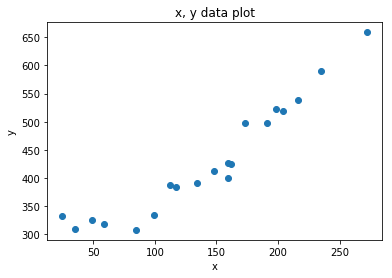

In [4]:
# 正規化前のデータを確認する
plt.title("x, y data plot")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(train_x, train_y, 'o')
plt.show()

x, yのデータをx軸、y軸のグラフに置き、xが増減したらyがどれだけ増減するかを予測する関数グラフの式を導き出す。

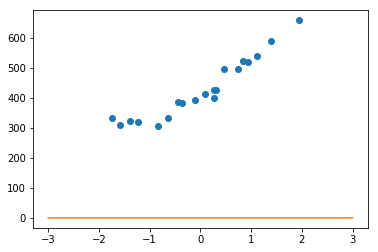

In [5]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 予測関数
def f(x):
    return theta0 + theta1 * x


# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()


In [6]:


# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# グラフ用
diff_list = []

# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # パラメータを更新
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 前回の誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    # グラフ用に差分を保存
    diff_list.append(diff)

    # ログの出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))



1回目: theta0 = 9.182, theta1 = 1.883, 差分 = 76182.9883
2回目: theta0 = 17.581, theta1 = 3.714, 差分 = 73166.1419
3回目: theta0 = 25.813, theta1 = 5.510, 差分 = 70268.7627
4回目: theta0 = 33.879, theta1 = 7.269, 差分 = 67486.1197
5回目: theta0 = 41.785, theta1 = 8.993, 差分 = 64813.6694
6回目: theta0 = 49.532, theta1 = 10.683, 差分 = 62247.0481
7回目: theta0 = 57.125, theta1 = 12.339, 差分 = 59782.0650
8回目: theta0 = 64.565, theta1 = 13.962, 差分 = 57414.6952
9回目: theta0 = 71.857, theta1 = 15.552, 差分 = 55141.0733
10回目: theta0 = 79.003, theta1 = 17.111, 差分 = 52957.4868
11回目: theta0 = 86.006, theta1 = 18.638, 差分 = 50860.3703
12回目: theta0 = 92.868, theta1 = 20.135, 差分 = 48846.2996
13回目: theta0 = 99.594, theta1 = 21.602, 差分 = 46911.9862
14回目: theta0 = 106.185, theta1 = 23.039, 差分 = 45054.2715
15回目: theta0 = 112.645, theta1 = 24.448, 差分 = 43270.1224
16回目: theta0 = 118.975, theta1 = 25.829, 差分 = 41556.6255
17回目: theta0 = 125.178, theta1 = 27.182, 差分 = 39910.9831
18回目: theta0 = 131.258, theta1 = 28.508, 差分 = 38330.5082
19

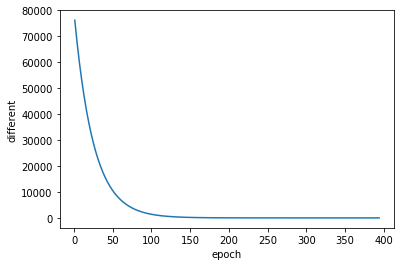

In [7]:
# 差分のグラフ出力
plt.xlabel('epoch')
plt.ylabel('different')
plt.plot(np.arange(1, count+1), diff_list)
plt.show()

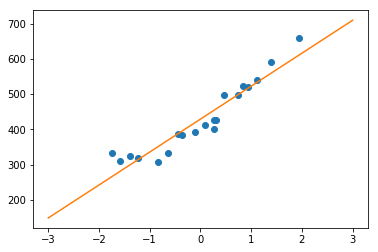

In [8]:
# 更新後のパラメータの式を確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()


In [17]:
# 試しに適当な値を入れて検証
f(standardize(1))

232.86012937183821